In [2]:
from matplotlib import pyplot as plt

from sykepic.analysis.frequency import frequency_df, filter_df

In [5]:
# Root directory prediction CSV-files
pred_dir = 'predictions'

# Confidence threshold repsesents the minimum probability a required for a valid prediction.
# It can be single float value (e.g. 0.7), or a path to an exteranl file with class specific thresholds.
# See this example file for formatting.
thresholds = 'confidence_thresholds.txt'

# Start date and time to filter samples (CSV-files) by. 
# It must follow the formatting of `date_format` (see below).
# The reason for filtering the CSV-files before reading everything to a dataframe is because
# prediction_directory can have a lot of data, which might not be reasonable to read to memory at once.
start = '2018-07-03 00:00'

# Same as previous but for the end.
end = '2018-07-03 23:59'

# Allow only those samples that are withing this hour window (date doesn't matter).
# The formatting has to match the this: "[hour]:[minute]-[hour]:[minute]"
# e.g. for samples taken around mid-day, you could set this to "11:30-12:30"
hour_window = None

# The date and time formatting used for `start` and `end`.
# The default formatting below is this: "[year]-[month]-[day] [hour]:[minute]"
date_format='%Y-%m-%d %H:%M'

In [6]:
# Create the dataframe
df = frequency_df(pred_dir, thresholds, start, end, hour_window, date_format)

# And see what it looks like
df.head()

[INFO] Using predictions from 2 samples


,Aphanizomenon_flosaquae,Beads,Ceratoneis_closterium,Chaetoceros_sp,Chaetoceros_sp_single,Chroococcales,Ciliata,Cryptomonadales,Cryptophyceae-Teleaulax,Cyclotella_choctawhatcheeana,...,Heterocyte,Mesodinium_rubrum,Oocystis_sp,Oscillatoriales,Pennales_sp_thick,Pennales_sp_thin,Pseudopedinella_sp,Pyramimonas_sp,Skeletonema_marinoi,Uroglenopsis_sp
,,,,,,,,,,,,,,,,,,,,,
2018-07-03 09:34:53,16.0,2.0,2.0,NaN,15.0,1.0,7.0,26.0,173.0,1.0,...,1.0,16.0,1.0,NaN,2.0,4.0,31.0,689.0,NaN,13.0
2018-07-03 09:58:05,17.0,NaN,2.0,3.0,13.0,NaN,10.0,32.0,164.0,NaN,...,5.0,15.0,NaN,1.0,NaN,5.0,31.0,820.0,2.0,7.0


In [7]:
# It's probably not a good idea to show all classes in the plot.
# You can filter df easily with the helper function: `filter_df()`

# It takes as arguments the dataframe to filter and one of the following:

# 1. prediction 
# One class name (string) or a list of class names (list of strings):
prediction = ['Aphanizomenon_flosaquae', 'Oscillatoriales']
df2 = filter_df(df, prediction=prediction)

# 2. top
# For the `top` most frequent classes
df3 = filter_df(df, top=2)

Text(0, 0.5, 'Frequency')

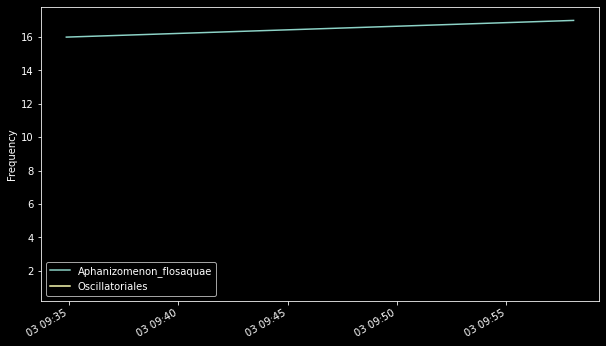

In [8]:
# Lets plot df2
plt.style.use('dark_background')
df2.plot(figsize=(10, 6))
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

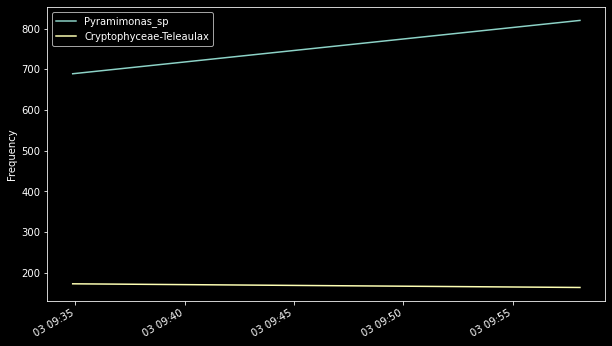

In [9]:
# And df3
plt.style.use('dark_background')
df3.plot(figsize=(10, 6))
plt.ylabel('Frequency')